#### Extraemos de la base de datos las variables indepencientes (X) y la dependiente (y)

In [11]:
import pandas as pd
import numpy as np

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.cluster import KMeans


ENS_2017_valida_2 = pd.read_csv("../data/Bases_trabajo/ENS_2017_valida_2.csv", sep =',')

# Pasamos a array la variable que queremos predecir ('actual')
y = np.array(ENS_2017_valida_2['Salud_percibida'])
# Eliminamos del dataframe la variable que queremos predecir y mantenemos el resto como columnas (serán las variables predictoras:X)
# axis 1 se refiere a las columnas
X= np.array(ENS_2017_valida_2.drop('Salud_percibida', axis = 1))
X.shape



(23089, 35)

In [2]:
# Dividimos en muestra de entrenamiento y de test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

#### Determinamos el número de Clusters óptimo en nuestra muestra de entrenamiento

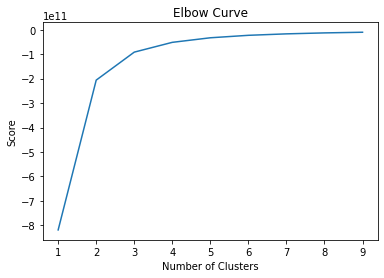

In [12]:
# Identificamos el número de clústers más adecuado viendo en una gráfica cual puede ser el elbow (codo). El número de clústers a partir del cual ya no aumenta de forma importante el score
import matplotlib.pyplot as plt

Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X_train).score(X_train) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

# UTILIZAREMOS 4 CLÚSTERS

### 4 Clústers

In [16]:
# establecemos el modelo de cluster con Kmeans

kmeans_train = KMeans(n_clusters=4, random_state=42).fit(X_train)
print("kmeans.labels_:", kmeans_train.labels_)
predict_train = kmeans_train.predict(X_train)
print("\npredict:", predict_train)
clusters_train = kmeans_train.cluster_centers_
print(f'\nKMeans cluster centers 3:\n {clusters_train}')

kmeans.labels_: [3 1 3 ... 2 2 3]

predict: [3 1 3 ... 2 2 3]

KMeans cluster centers 3:
 [[8.66088494e+03 9.84058282e+00 1.53010499e+00 5.40276409e+01
  2.35868867e+00 1.06278123e+00 1.94943218e+00 2.05035355e+00
  5.74823227e+00 1.74651811e+00 1.02485537e+00 1.03085494e+00
  1.81208485e+00 1.83222627e+00 7.27030212e+01 1.98778659e+00
  1.68223698e+00 2.92264838e+00 3.64173988e+00 3.50117849e+00
  2.87615170e+00 1.34476109e+00 2.06213842e+00 3.76173130e+00
  3.61667024e+00 1.38311549e+00 3.27683737e+00 4.93164774e+00
  4.49925005e+00 3.88515106e+00 3.09620741e+00 5.54188987e+00
  3.93550461e+00 3.97728734e+00 2.68823655e+00]
 [2.02121673e+04 8.14820490e+00 1.54487741e+00 5.33450088e+01
  2.47898424e+00 1.05100701e+00 1.93388792e+00 2.08493870e+00
  5.80297723e+00 1.77451839e+00 1.02889667e+00 1.03305604e+00
  1.78787215e+00 1.85573555e+00 7.28211471e+01 1.92819615e+00
  1.83690893e+00 2.96278459e+00 3.69570928e+00 3.58537653e+00
  3.07815236e+00 1.34763573e+00 2.05297723e+00 3.8820052

In [18]:
k_train_score = metrics.accuracy_score(y_train, predict_train)
print(f'K_train_Score: {k_train_score.round(2)}')


K_train_Score: 0.25


### Vemos si mejora el score en el conjunto de test


In [19]:
kmeans_test = KMeans(n_clusters=4, random_state=42).fit(X_test)
print("kmeans.labels_:", kmeans_test.labels_)
predict_test = kmeans_test.predict(X_test)
print("\npredict:", predict_test)
clusters_test = kmeans_test.cluster_centers_
print(f'\nKMeans cluster centers 3:\n {clusters_test}')

kmeans.labels_: [2 3 1 ... 1 0 1]

predict: [2 3 1 ... 1 0 1]

KMeans cluster centers 3:
 [[8.42766174e+03 9.44085028e+00 1.52680222e+00 5.44066543e+01
  2.40850277e+00 1.04990758e+00 1.96395564e+00 2.04158965e+00
  5.66820702e+00 1.74121996e+00 1.03049908e+00 1.03881701e+00
  1.81330869e+00 1.84565619e+00 7.24269871e+01 2.00462107e+00
  1.66081331e+00 2.92883549e+00 3.61090573e+00 3.48059150e+00
  2.88262477e+00 1.35489834e+00 2.06469501e+00 3.71164510e+00
  3.56561922e+00 1.39556377e+00 3.31885397e+00 4.94085028e+00
  4.47689464e+00 3.85027726e+00 3.10998152e+00 5.65249538e+00
  3.90295749e+00 4.08687616e+00 2.68484288e+00]
 [2.00680426e+04 7.99357430e+00 1.52851406e+00 5.40441767e+01
  2.46666667e+00 1.05863454e+00 1.88192771e+00 2.05783133e+00
  5.73654618e+00 1.75823293e+00 1.03052209e+00 1.02329317e+00
  1.77991968e+00 1.85943775e+00 7.42546185e+01 1.93654618e+00
  1.81285141e+00 2.98795181e+00 3.66104418e+00 3.58072289e+00
  3.06024096e+00 1.38232932e+00 2.05863454e+00 3.8706827

In [20]:
k_test_score = metrics.accuracy_score(y_test, predict_test)
print(f'K_train_Score: {k_test_score.round(2)}')

K_train_Score: 0.26


### Hallamos Clúster con el método DBSCAN


In [21]:
# Importamos DBSCAN
from sklearn.cluster import DBSCAN

# Para DBSCAN 
# Normalizamos los datos
# X_train = StandardScaler().fit_transform(X_train)

# Definimos DBSCAN 2
DB_train = DBSCAN(eps=0.2, min_samples=5).fit(X_train)
core_samples_mask = np.zeros_like(DB_train.labels_, dtype=bool)
core_samples_mask[DB_train.core_sample_indices_] = True
y_DB_train = DB_train.labels_



In [22]:
DB_train_Score = metrics.accuracy_score(y_train, y_DB_train)

print('DB_train_Score:', DB_train_Score.round(2))

DB_train_Score: 0.0


### Normalizamos los datos de las X

In [27]:
# Normalizamos los datos
X_train_N = StandardScaler().fit_transform(X_train)

In [28]:
kmeans_train_N = KMeans(n_clusters=4, random_state=42).fit(X_train_N)
print("kmeans.labels_:", kmeans_train_N.labels_)
predict_train = kmeans_train_N.predict(X_train_N)
print("\npredict:", predict_train)
clusters_train = kmeans_train_N.cluster_centers_
print(f'\nKMeans cluster centers 3:\n {clusters_train}')

kmeans.labels_: [1 1 3 ... 1 1 2]

predict: [1 1 3 ... 1 1 2]

KMeans cluster centers 3:
 [[-1.26472484e-01 -8.83539103e-02 -1.55104416e-01 -1.06193915e+00
   1.69471227e-01  3.88215447e-01  4.94685568e-01 -5.49596893e-01
  -3.13124382e-02  4.32053716e-01  3.36031029e+00  3.54664052e+00
   3.80417089e-01  3.27100283e-01 -2.61954094e-01  2.12819035e-01
   4.80172575e-01 -1.83839445e-01 -1.49382466e-01  2.36934489e-01
  -1.78087380e-01  3.66179048e-03  4.09204108e-01  4.45936062e-02
  -2.29122780e-01  1.08948704e-01 -2.27076220e-01 -6.18022485e-01
  -8.02684801e-02  1.97888474e-02  3.39664349e-02  1.94729058e-01
  -6.82692282e-04  1.32736355e-01 -3.89149954e-01]
 [-1.05419010e-02 -6.43762920e-02 -6.90549417e-01 -3.70753311e-01
  -4.29759576e-01  9.66302886e-02 -1.26791992e-01 -1.85264051e-01
   2.27144536e-04  3.65283279e-01 -1.70535627e-01 -1.80531664e-01
   1.25000169e-01  1.48352118e-01  6.82094082e-01 -1.15827682e-01
   4.73562905e-01 -3.09815576e-01 -1.00891474e-01  2.34301468e-01
 

In [29]:
k_train_N_score = metrics.accuracy_score(y_train, predict_train)
print(f'K_train_N_Score: {k_train_N_score.round(2)}')

K_train_Score: 0.35


### Vemos si mejora el modelo en el conjunto de test con valores X normalizados

In [30]:
# Normalizamos los datos
X_test_N = StandardScaler().fit_transform(X_test)

In [31]:
kmeans_test_N = KMeans(n_clusters=4, random_state=42).fit(X_test_N)
print("kmeans.labels_:", kmeans_test_N.labels_)
predict_test = kmeans_test_N.predict(X_test_N)
print("\npredict:", predict_test)
clusters_test = kmeans_test_N.cluster_centers_
print(f'\nKMeans cluster centers 3:\n {clusters_test}')

kmeans.labels_: [3 3 3 ... 3 1 3]

predict: [3 3 3 ... 3 1 3]

KMeans cluster centers 3:
 [[-1.13698314e-01 -2.67363335e-01 -2.28849805e-01 -9.43354216e-01
   4.14503110e-02  5.12173176e-01  4.63607783e-01 -5.50445550e-01
  -7.55697763e-02  4.30175888e-01  5.67653253e+00  2.15728413e+00
   3.00759504e-01  3.38804138e-01 -2.06746321e-01  1.04881303e-01
   5.87324258e-01 -1.21432814e-01 -1.47190786e-01  4.63443180e-01
  -3.38427375e-01 -8.61078883e-02  3.63424205e-01 -2.17010110e-02
  -1.88984228e-01  7.40058552e-02 -2.24443741e-01 -4.84083379e-01
  -3.15383887e-02  4.97453362e-02 -6.32660920e-02  2.21503197e-01
  -1.65722757e-01  7.96491318e-02 -3.70514429e-01]
 [-7.14975216e-04  1.55986471e-03  2.41869107e-01  9.47155337e-01
   7.19362522e-01 -1.70710224e-01  4.55356005e-02  3.24244037e-01
  -7.58922950e-01 -7.36508353e-01 -1.76163881e-01 -1.56318466e-01
  -2.26162003e-01 -2.20543198e-01  5.44698960e-03 -3.57392342e-01
  -3.19373575e-01  2.80594739e-01  1.35688813e-01 -1.88327342e-01
 

In [32]:
k_test_N_score = metrics.accuracy_score(y_test, predict_test)
print(f'K_test_N_Score: {k_test_N_score.round(2)}')

K_test_Score: 0.21


In [33]:
# Importamos DBSCAN
from sklearn.cluster import DBSCAN

# Para DBSCAN 
# Normalizamos los datos
X_train_N = StandardScaler().fit_transform(X_train)

# Definimos DBSCAN 2
DB_train_N = DBSCAN(eps=0.2, min_samples=5).fit(X_train_N)
core_samples_mask = np.zeros_like(DB_train_N.labels_, dtype=bool)
core_samples_mask[DB_train_N.core_sample_indices_] = True
y_DB_train_N = DB_train_N.labels_


In [34]:
DB_train_Score = metrics.accuracy_score(y_train, y_DB_train_N)

print('DB_train_N_Score:', DB_train_Score.round(2))

DB_train_N_Score: 0.0


### 3 Clústers. Igual que los valores de la VD

In [36]:
ENS_2017_valida_2 = pd.read_csv("../data/Bases_trabajo/ENS_2017_valida_2.csv", sep =',')

# Pasamos a array la variable que queremos predecir ('actual')
y = np.array(ENS_2017_valida_2['Salud_percibida'])
# Eliminamos del dataframe la variable que queremos predecir y mantenemos el resto como columnas (serán las variables predictoras:X)
# axis 1 se refiere a las columnas
X= np.array(ENS_2017_valida_2.drop('Salud_percibida', axis = 1))
X.shape

(23089, 35)

In [37]:
# Dividimos en muestra de entrenamiento y de test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [38]:
# establecemos el modelo de cluster con Kmeans

kmeans_train = KMeans(n_clusters=3, random_state=42).fit(X_train)
print("kmeans.labels_:", kmeans_train.labels_)
predict_train = kmeans_train.predict(X_train)
print("\npredict:", predict_train)
clusters_train = kmeans_train.cluster_centers_
print(f'\nKMeans cluster centers 3:\n {clusters_train}')

kmeans.labels_: [2 0 2 ... 1 1 0]

predict: [2 0 2 ... 1 1 0]

KMeans cluster centers 3:
 [[1.92048098e+04 7.72967282e+00 1.54324587e+00 5.34036281e+01
  2.47100745e+00 1.04842890e+00 1.94088111e+00 2.09199870e+00
  5.76336249e+00 1.77632005e+00 1.02607710e+00 1.02802073e+00
  1.78701004e+00 1.85017817e+00 7.28312277e+01 1.94671202e+00
  1.81778426e+00 3.06073858e+00 3.71914480e+00 3.61499838e+00
  3.01490120e+00 1.36977648e+00 2.14123745e+00 3.88111435e+00
  3.51522514e+00 1.36993845e+00 3.37755102e+00 4.98380305e+00
  4.41690962e+00 3.97635245e+00 3.06073858e+00 5.71023648e+00
  4.02121801e+00 3.99595076e+00 2.67622287e+00]
 [3.81867674e+03 7.95162608e+00 1.54044779e+00 5.33876450e+01
  2.37767609e+00 1.07109005e+00 1.94672332e+00 2.06291878e+00
  5.66857330e+00 1.78100997e+00 1.03268508e+00 1.04003922e+00
  1.83281582e+00 1.85847361e+00 7.22493872e+01 1.87890178e+00
  1.69717274e+00 3.02925315e+00 3.77120445e+00 3.59764667e+00
  2.59405132e+00 1.31867952e+00 1.99950972e+00 3.8133682

In [39]:
k_train_score = metrics.accuracy_score(y_train, predict_train)
print(f'K_train_Score: {k_train_score.round(2)}')

K_train_Score: 0.3


In [40]:
# establecemos el modelo de cluster con Kmeans

kmeans_test = KMeans(n_clusters=3, random_state=42).fit(X_test)
print("kmeans.labels_:", kmeans_test.labels_)
predict_test = kmeans_test.predict(X_test)
print("\npredict:", predict_test)
clusters_test = kmeans_test.cluster_centers_
print(f'\nKMeans cluster centers 3:\n {clusters_test}')

kmeans.labels_: [1 2 0 ... 0 1 0]

predict: [1 2 0 ... 0 1 0]

KMeans cluster centers 3:
 [[1.93726094e+04 7.85583224e+00 1.52883355e+00 5.36513761e+01
  2.45543906e+00 1.05111402e+00 1.90563565e+00 2.05570118e+00
  5.72018349e+00 1.76867628e+00 1.02948886e+00 1.02228047e+00
  1.78374836e+00 1.85648755e+00 7.39547837e+01 1.95150721e+00
  1.80996068e+00 3.04390564e+00 3.67300131e+00 3.59633028e+00
  2.99475754e+00 1.41480996e+00 2.14220183e+00 3.87352556e+00
  3.50720839e+00 1.38925295e+00 3.43512451e+00 4.98427261e+00
  4.44036697e+00 3.98165138e+00 3.06422018e+00 5.55897772e+00
  4.01769332e+00 4.03931848e+00 2.73853211e+00]
 [3.98502268e+03 7.58538122e+00 1.52804033e+00 5.39647133e+01
  2.42344045e+00 1.06931317e+00 1.89540013e+00 2.06868305e+00
  5.59861374e+00 1.77504726e+00 1.03339635e+00 1.03780718e+00
  1.82671708e+00 1.85129175e+00 7.28052930e+01 1.85507246e+00
  1.71266541e+00 3.01386263e+00 3.76811594e+00 3.57971014e+00
  2.60743541e+00 1.27410208e+00 1.96534342e+00 3.7422810

In [42]:
k_test_score = metrics.accuracy_score(y_test, predict_test)
print(f'K_test_Score: {k_test_score.round(2)}')

K_test_Score: 0.3


In [43]:
# Normalizamos los datos
X_train_N = StandardScaler().fit_transform(X_train)

In [44]:
kmeans_train_N = KMeans(n_clusters=3, random_state=42).fit(X_train_N)
print("kmeans.labels_:", kmeans_train_N.labels_)
predict_train = kmeans_train_N.predict(X_train_N)
print("\npredict:", predict_train)
clusters_train = kmeans_train_N.cluster_centers_
print(f'\nKMeans cluster centers 3:\n {clusters_train}')

kmeans.labels_: [1 1 2 ... 1 1 0]

predict: [1 1 2 ... 1 1 0]

KMeans cluster centers 3:
 [[-2.09477330e-02 -2.77027140e-02  1.83844068e-01  9.26249568e-01
   6.83043183e-01 -1.73536770e-01  4.26985900e-02  3.71563518e-01
  -7.79655839e-01 -6.75143131e-01 -1.47528105e-01 -1.50000870e-01
  -2.11275549e-01 -2.20404054e-01  4.35916584e-02 -3.46687186e-01
  -2.85132717e-01  2.55685647e-01  1.24021987e-01 -1.30244929e-01
   5.70286723e-02 -9.60364674e-02 -7.35365961e-02 -3.35053321e-02
   3.02866750e-01 -8.57011906e-02  1.20797071e-01  5.76819755e-01
   2.37416761e-01 -3.42446411e-01  3.20630626e-01  2.37065734e-01
   1.30676219e-02  3.66984532e-01  2.95946414e-01]
 [-3.61986970e-02 -7.42047038e-02 -3.73047554e-01 -7.53368424e-01
  -2.81415531e-01  2.91459292e-01  1.73897674e-01 -3.96596778e-01
  -5.36576085e-02  4.46711463e-01  2.94304575e-01  3.27619578e-01
   2.96907549e-01  2.86051150e-01  2.06797333e-01 -1.02338428e-01
   6.53396473e-01 -3.45508843e-01 -1.15526266e-01  3.56599261e-01
 

In [45]:
k_train_N_score = metrics.accuracy_score(y_train, predict_train)
print(f'K_train_N_Score: {k_train_N_score.round(2)}')

K_train_N_Score: 0.3


In [46]:
# Normalizamos los datos
X_test_N = StandardScaler().fit_transform(X_test)

In [47]:
kmeans_test_N = KMeans(n_clusters=3, random_state=42).fit(X_test_N)
print("kmeans.labels_:", kmeans_test_N.labels_)
predict_test = kmeans_test_N.predict(X_test_N)
print("\npredict:", predict_test)
clusters_test = kmeans_test_N.cluster_centers_
print(f'\nKMeans cluster centers 3:\n {clusters_test}')

kmeans.labels_: [2 0 2 ... 2 0 2]

predict: [2 0 2 ... 2 0 2]

KMeans cluster centers 3:
 [[-0.01303898  0.00584964  0.23762715  0.90546955  0.68770058 -0.16924491
   0.04240585  0.3289843  -0.77661265 -0.67094693 -0.16556117 -0.15705716
  -0.20862831 -0.19842087  0.01938636 -0.35547687 -0.31267119  0.2733784
   0.15056327 -0.16336471  0.05558939 -0.1036286  -0.07893077 -0.03289838
   0.31050905 -0.05768979  0.13454782  0.54319721  0.20805518 -0.30294499
   0.33506253  0.30497544  0.00830854  0.37306101  0.30895135]
 [-0.07782743 -0.15509671 -0.37380889 -0.75075327 -0.28062445  0.34886144
   0.27592311 -0.33022959 -0.04868935  0.46128453  0.33371362  0.36056144
   0.28864535  0.27962072  0.19518624 -0.14904611  0.75118363 -0.28978033
  -0.06804862  0.42219984 -0.25416734 -0.00821264  0.48568913 -0.01915895
  -0.45406623  0.02694748 -0.25336386 -0.67772994  0.15710826 -0.15953203
  -0.48434326 -0.12759284 -0.10623572  0.35612855 -0.04304603]
 [ 0.07789672  0.12267318  0.06702581 -0.3033

In [48]:
k_test_N_score = metrics.accuracy_score(y_test, predict_test)
print(f'K_test_N_Score: {k_test_N_score.round(2)}')

K_test_N_Score: 0.28


### Aplicamos el modelo a todos los datos. Con 3 Clúster sin normalizar. Es el modelo en el que se obtienen un mejor Score

In [49]:
ENS_2017_valida_2 = pd.read_csv("../data/Bases_trabajo/ENS_2017_valida_2.csv", sep =',')

y = np.array(ENS_2017_valida_2['Salud_percibida'])

X= np.array(ENS_2017_valida_2.drop('Salud_percibida', axis = 1))


In [50]:
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)
print("kmeans.labels_:", kmeans.labels_)
predict = kmeans.predict(X)
print("\npredict:", predict)
clusters = kmeans.cluster_centers_
print(f'\nKMeans cluster centers 3:\n {clusters}')

kmeans.labels_: [2 2 2 ... 1 1 1]

predict: [2 2 2 ... 1 1 1]

KMeans cluster centers 3:
 [[1.15215000e+04 1.07767672e+01 1.54534823e+00 5.33778586e+01
  2.39851871e+00 1.06795738e+00 1.92918399e+00 2.07445426e+00
  5.87409044e+00 1.75272869e+00 1.02598753e+00 1.02702703e+00
  1.81704782e+00 1.83575884e+00 7.22544179e+01 2.03417360e+00
  1.72479210e+00 2.86772349e+00 3.57276507e+00 3.62240125e+00
  3.01858108e+00 1.34979210e+00 1.99051455e+00 3.76273389e+00
  3.63240644e+00 1.40059771e+00 3.16930873e+00 4.98999480e+00
  4.40059771e+00 4.02936590e+00 3.06496881e+00 5.53053534e+00
  3.93308212e+00 3.93620062e+00 2.67762474e+00]
 [1.92290000e+04 7.74297189e+00 1.54035497e+00 5.34503174e+01
  2.46949087e+00 1.04922917e+00 1.93444747e+00 2.08433735e+00
  5.75722244e+00 1.77458220e+00 1.02668739e+00 1.02681695e+00
  1.78637129e+00 1.85153517e+00 7.30513020e+01 1.94869802e+00
  1.81552015e+00 3.05583625e+00 3.70734551e+00 3.61264412e+00
  3.00816168e+00 1.37699184e+00 2.14211685e+00 3.8800362

In [51]:
k_score = metrics.accuracy_score(y, predict)
print(f'K_Score: {k_score.round(2)}')

K_Score: 0.3


### Añadimos una columna a nuestro Dataframe con la asignación de los Clústers a cada una de las filas

In [53]:
Clusters = kmeans.predict(X)
ENS_2017_valida_2['Clusters'] = Clusters

In [54]:
freq_Clusters = ENS_2017_valida_2['Clusters'].value_counts() / len(ENS_2017_valida_2['Clusters'])*100
freq_Clusters

1    33.405518
0    33.331890
2    33.262593
Name: Clusters, dtype: float64

In [55]:
freq_Clusters_abs = ENS_2017_valida_2['Clusters'].value_counts() 
freq_Clusters_abs

1    7713
0    7696
2    7680
Name: Clusters, dtype: int64

### Identificamos el perfil de cada Clúster

In [59]:
ENS_2017_valida_2.columns

Index(['Unnamed: 0', 'CCAA', 'Sexo', 'Edad', 'Actividad_economica_actual',
       'Nacionalidad_española', 'Convivencia', 'Estado_civil',
       'Nivel_estudios', 'Salud_percibida', 'Vacunación_gripe',
       'Toma_tensiónArterial_profesional', 'Medición_colesterol',
       'Prueba_sangreHeces', 'Colonoscopia', 'Peso(Kg)',
       'Freq_ActividadFísica', 'Freq_Consumo_FrutaFresca',
       'Freq_Consumo_Carne', 'Freq_Consumo_Huevos', 'Freq_Consumo_Pescado',
       'Freq_Consumo_PastaArrozPatatas', 'Freq_Consumo_PanCereales',
       'Freq_Consumo_VerdurasEnsaladasHortalizas', 'Freq_Consumo_Legumbres',
       'Freq_Consumo_EmbutidosFiambres', 'Freq_Consumo_Lácteos',
       'Freq_Consumo_Dulces', 'Freq_Consumo_ComidaRápida',
       'Freq_Consumo_ZumoNatural', 'Freq_Diaria_CepilladoDientes',
       '¿Fuma actualmente', 'Freq_Consumo_Alcohol',
       'ApoyoAfectivoPersonal_AmigosFamiliares', 'ClaseSocial_BasadaOcupación',
       'Índice_MasaCorporal', 'Clusters'],
      dtype='object')

In [58]:
Cluster_SaludPercibida = pd.crosstab(ENS_2017_valida_2['Clusters'],ENS_2017_valida_2['Salud_percibida'],margins = False)
print(Cluster_SaludPercibida)

Salud_percibida     1     2    3
Clusters                        
0                5103  1856  737
1                5164  1833  716
2                5068  1842  770


In [61]:
Cluster_Sexo = pd.crosstab(ENS_2017_valida_2['Clusters'],ENS_2017_valida_2['Sexo'],margins = False)
print(Cluster_Sexo)

Sexo         1     2
Clusters            
0         3501  4195
1         3543  4170
2         3551  4129


In [62]:
Cluster_CCAA = pd.crosstab(ENS_2017_valida_2['Clusters'],ENS_2017_valida_2['CCAA'],margins = False)
print(Cluster_CCAA)

CCAA        1    2    3    4     5    6    7    8     9    10   11   12    13  \
Clusters                                                                        
0         1145  147  581    0     0    0  211  140   126    0    0  311  2032   
1          682  898  258    0  1120  797  808  352   229  857    0  433     0   
2         1108    0    0  923     0    0  268  635  2008  974  952  591     0   

CCAA        14   15   16   17   18   19  
Clusters                                 
0         1026  777  530  670    0    0  
1            0    0  743    0  255  281  
2            0    0  221    0    0    0  


In [63]:
Cluster_Actividad_economica_actual = pd.crosstab(ENS_2017_valida_2['Clusters'],ENS_2017_valida_2['Actividad_economica_actual'],margins = False)
print(Cluster_Actividad_economica_actual)

Actividad_economica_actual   1.0  2.0   3.0  4.0  5.0  6.0
Clusters                                                  
0                           3446  726  2182  431  179  732
1                           3220  870  2177  463  199  784
2                           3281  891  2249  415  204  640


In [64]:
Cluster_Nacionalidad_española = pd.crosstab(ENS_2017_valida_2['Clusters'],ENS_2017_valida_2['Nacionalidad_española'],margins = False)
print(Cluster_Nacionalidad_española)

Nacionalidad_española     1    2
Clusters                        
0                      7173  523
1                      7333  380
2                      7136  544


In [65]:
Cluster_Convivencia = pd.crosstab(ENS_2017_valida_2['Clusters'],ENS_2017_valida_2['Convivencia'],margins = False)
print(Cluster_Convivencia)

Convivencia   1.0  2.0   3.0
Clusters                    
0            4004  233  3459
1            4053  113  3547
2            3957  254  3469


In [96]:
Cluster_Estado_civil = pd.crosstab(index =ENS_2017_valida_2['Clusters'],columns =ENS_2017_valida_2['Estado_civil']).apply(lambda r: r/r.sum() *100,axis=0)

print(Cluster_Estado_civil)

Estado_civil        1.0        2.0        3.0        4.0        5.0
Clusters                                                           
0             33.389946  33.405310  32.436070  34.111311  34.160959
1             32.608696  33.541267  34.253028  33.931777  33.561644
2             34.001359  33.053423  33.310902  31.956912  32.277397


In [95]:
Cluster_Nivel_estudios = pd.crosstab(index =ENS_2017_valida_2['Clusters'],columns =ENS_2017_valida_2['Nivel_estudios']).apply(lambda r: r/r.sum() *100,axis=0)

print(Cluster_Nivel_estudios)

Nivel_estudios          2          3          4          5          6  \
Clusters                                                                
0               24.942792  36.789588  30.465950  30.265775  36.252617   
1               31.121281  29.023861  37.096774  33.068161  32.100488   
2               43.935927  34.186551  32.437276  36.666064  31.646895   

Nivel_estudios          7          8          9  
Clusters                                         
0               32.813515  32.896983  37.780430  
1               33.723197  36.767217  31.933174  
2               33.463288  30.335800  30.286396  


In [94]:
Cluster_Vacunación_gripe = pd.crosstab(index =ENS_2017_valida_2['Clusters'],columns =ENS_2017_valida_2['Vacunación_gripe']).apply(lambda r: r/r.sum() *100,axis=0)

print(Cluster_Vacunación_gripe)

Vacunación_gripe          1         2
Clusters                             
0                 35.761216  32.60331
1                 32.607471  33.64486
2                 31.631312  33.75183


In [93]:
Cluster_Toma_tensiónArterial_profesional = pd.crosstab(index =ENS_2017_valida_2['Clusters'],columns =ENS_2017_valida_2['Toma_tensiónArterial_profesional']).apply(lambda r: r/r.sum() *100,axis=0)

print(Cluster_Toma_tensiónArterial_profesional)

Toma_tensiónArterial_profesional        1.0        2.0
Clusters                                              
0                                 33.422508  30.257186
1                                 33.471553  31.164902
2                                 33.105939  38.577912


In [92]:
Cluster_Prueba_sangreHeces = pd.crosstab(index =ENS_2017_valida_2['Clusters'],columns =ENS_2017_valida_2['Prueba_sangreHeces']).apply(lambda r: r/r.sum() *100, axis=0)

print(Cluster_Prueba_sangreHeces)

Prueba_sangreHeces        1.0        2.0
Clusters                                
0                   32.398897  33.548594
1                   37.844669  32.374446
2                   29.756434  34.076960


In [91]:
Cluster_Colonoscopia = pd.crosstab(index =ENS_2017_valida_2['Clusters'],columns =ENS_2017_valida_2['Colonoscopia']).apply(lambda r: r/r.sum() *100,
                                axis=0)
print(Cluster_Colonoscopia)

Colonoscopia        1.0        2.0
Clusters                          
0             36.050157  32.844740
1             32.630379  33.544433
2             31.319464  33.610827


In [90]:
Cluster_Freq_ActividadFísica = pd.crosstab(index =ENS_2017_valida_2['Clusters'],columns =ENS_2017_valida_2['Freq_ActividadFísica']).apply(lambda r: r/r.sum() *100,
                                axis=0)
print(Cluster_Freq_ActividadFísica)

Freq_ActividadFísica        1.0        2.0        3.0        4.0
Clusters                                                        
0                     31.088083  33.219178  32.587358  42.075038
1                     36.224375  29.949183  29.681979  39.433384
2                     32.687542  36.831639  37.730664  18.491577


In [89]:
Cluster_Freq_Consumo_FrutaFresca = pd.crosstab(index =ENS_2017_valida_2['Clusters'],columns =ENS_2017_valida_2['Freq_Consumo_FrutaFresca']).apply(lambda r: r/r.sum() *100,
                                axis=0)
print(Cluster_Freq_Consumo_FrutaFresca)

Freq_Consumo_FrutaFresca        1.0        2.0        3.0        4.0  \
Clusters                                                               
0                         34.388461  28.395062  32.617801  32.674419   
1                         32.065005  33.676269  39.057592  37.093023   
2                         33.546534  37.928669  28.324607  30.232558   

Freq_Consumo_FrutaFresca        5.0        6.0  
Clusters                                        
0                         34.051144  33.682008  
1                         35.935397  34.937238  
2                         30.013459  31.380753  


In [82]:
def crosstabs (df,col1,col2):
    Cluster_col2 = pd.crosstab(index =df['col1'],columns =df['col2']).apply(lambda r: r/r.sum() *100,axis=0)
    return Cluster_col2

crosstabs (ENS_2017_valida_2, Clusters, Freq_Consumo_FrutaFresca)